In [2]:
data1

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [7]:
data1['attack_detected'].value_counts()

attack_detected
0    5273
1    4264
Name: count, dtype: int64

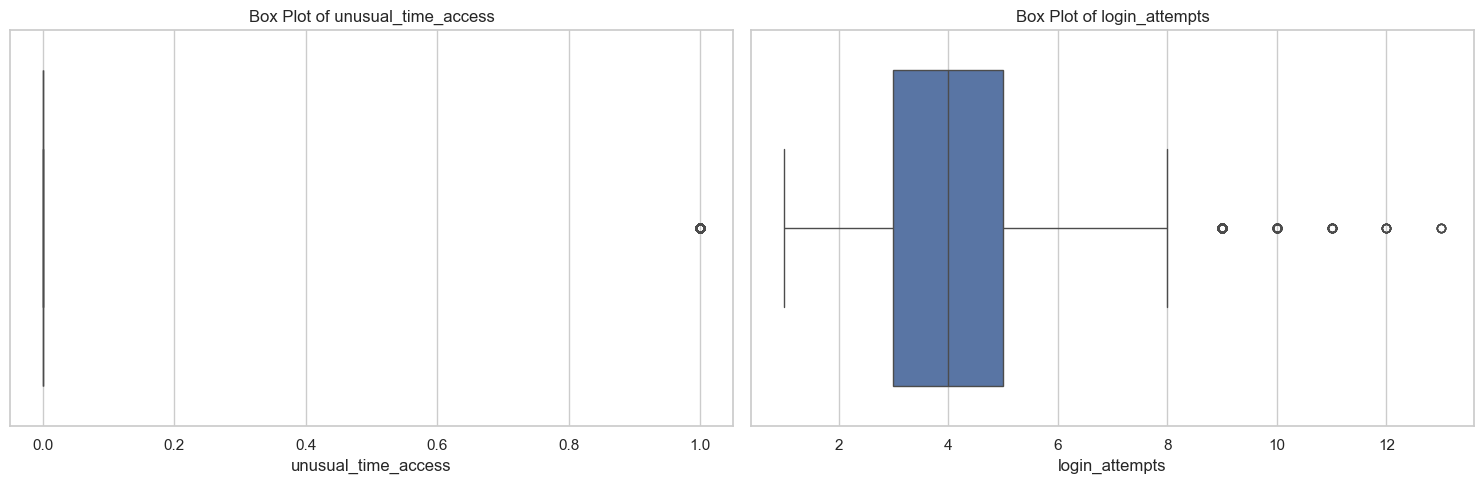

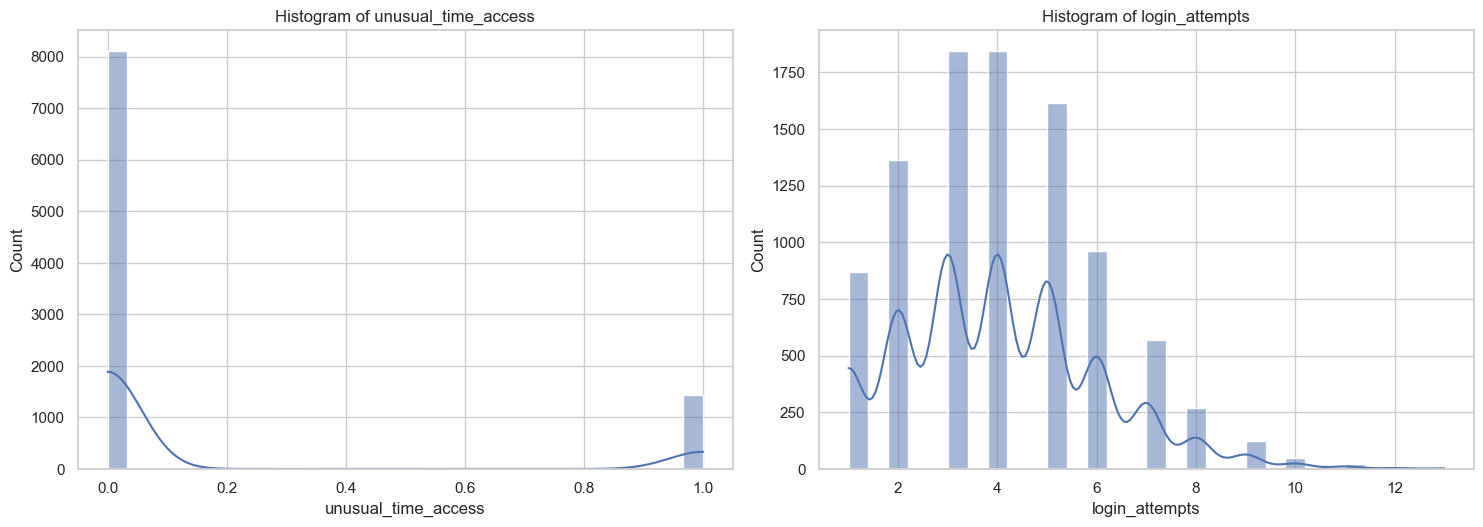

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

numeric_columns = ['unusual_time_access', 'login_attempts']
# Create a figure with subplots for box plots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

# Loop through numeric columns to create box plots for original data
for i, column in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], x=data1[column])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Create a figure with subplots for histograms
plt.figure(figsize=(15, 10))

# Plot histograms for the original DataFrame
for i, column in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns), i + 1)
    sns.histplot(data1[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


In [11]:
from sklearn import preprocessing
unscaled_data = data1.iloc[:, 1:-1]  # Select all rows, columns from index 1 to second last
targets_data = data1.iloc[:,-1]


In [13]:
import pandas as pd

# Assuming unscaled_data is a pandas DataFrame
unscaled_data_dummies = pd.get_dummies(unscaled_data)

# Display the first few rows of the data with dummies
print(unscaled_data_dummies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   network_packet_size   9537 non-null   int64  
 1   login_attempts        9537 non-null   int64  
 2   session_duration      9537 non-null   float64
 3   ip_reputation_score   9537 non-null   float64
 4   failed_logins         9537 non-null   int64  
 5   unusual_time_access   9537 non-null   int64  
 6   protocol_type_ICMP    9537 non-null   bool   
 7   protocol_type_TCP     9537 non-null   bool   
 8   protocol_type_UDP     9537 non-null   bool   
 9   encryption_used_AES   9537 non-null   bool   
 10  encryption_used_DES   9537 non-null   bool   
 11  browser_type_Chrome   9537 non-null   bool   
 12  browser_type_Edge     9537 non-null   bool   
 13  browser_type_Firefox  9537 non-null   bool   
 14  browser_type_Safari   9537 non-null   bool   
 15  browser_type_Unknown 

In [15]:
num_one_targets = int(np.sum(targets_data))
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets_data.shape[0]):
    if targets_data[i] ==0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

unscaled_inputs_equal_priors = np.delete(unscaled_data_dummies, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_data, indices_to_remove, axis = 0)

In [17]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

In [19]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

In [21]:
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

In [23]:
# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

3401 6822 0.49853415420697744
422 852 0.4953051643192488
441 854 0.5163934426229508


In [25]:
# Save the three datasets in *.npz.
# In the next lesson, you will see that it is extremely valuable to name them in such a coherent way!

np.savez('sec_data_train', inputs=train_inputs, targets=train_targets)
np.savez('sec_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('sec_data_test', inputs=test_inputs, targets=test_targets)

In [27]:
!pip install tensorflow



In [29]:
# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('sec_data_train.npz')

# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(int)

# we load the validation data in the temporary variable
npz = np.load('sec_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

# we load the test data in the temporary variable
npz = np.load('sec_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

In [31]:
import numpy as np

npz = np.load('sec_data_train.npz')

# Get the number of features (columns)
num_features = npz['inputs'].shape[1]  # Second dimension

print(f"Number of features (inputs per sample): {num_features}")


Number of features (inputs per sample): 16


In [33]:
scaled_inputs

array([[ 0.50174483, -0.04797166, -0.38435976, ..., -0.50684337,
        -0.23043335, -0.24448687],
       [-0.13812497, -0.54748614,  0.95421483, ...,  1.97299613,
        -0.23043335, -0.24448687],
       [ 0.65289518, -0.54748614, -0.90965139, ..., -0.50684337,
        -0.23043335, -0.24448687],
       ...,
       [ 1.24238154,  1.45057175, -0.60786941, ..., -0.50684337,
        -0.23043335, -0.24448687],
       [-1.53878487, -0.54748614, -0.71985816, ..., -0.50684337,
        -0.23043335, -0.24448687],
       [-0.80318651,  0.95105728, -0.8947796 , ..., -0.50684337,
        -0.23043335, -0.24448687]])

Epoch 1/100
69/69 - 2s - 34ms/step - accuracy: 0.6416 - loss: 0.6307 - val_accuracy: 0.7289 - val_loss: 0.5573
Epoch 2/100
69/69 - 0s - 3ms/step - accuracy: 0.7142 - loss: 0.5523 - val_accuracy: 0.7418 - val_loss: 0.5272
Epoch 3/100
69/69 - 0s - 3ms/step - accuracy: 0.7476 - loss: 0.5180 - val_accuracy: 0.7606 - val_loss: 0.4998
Epoch 4/100
69/69 - 0s - 3ms/step - accuracy: 0.7685 - loss: 0.4899 - val_accuracy: 0.7770 - val_loss: 0.4731
Epoch 5/100
69/69 - 0s - 3ms/step - accuracy: 0.7882 - loss: 0.4680 - val_accuracy: 0.8063 - val_loss: 0.4460
Epoch 6/100
69/69 - 0s - 3ms/step - accuracy: 0.8028 - loss: 0.4422 - val_accuracy: 0.8204 - val_loss: 0.4228
Epoch 7/100
69/69 - 0s - 5ms/step - accuracy: 0.8089 - loss: 0.4254 - val_accuracy: 0.8251 - val_loss: 0.4047
Epoch 8/100
69/69 - 0s - 5ms/step - accuracy: 0.8190 - loss: 0.4098 - val_accuracy: 0.8322 - val_loss: 0.3919
Epoch 9/100
69/69 - 0s - 3ms/step - accuracy: 0.8247 - loss: 0.3983 - val_accuracy: 0.8415 - val_loss: 0.3852
Epoch 10/

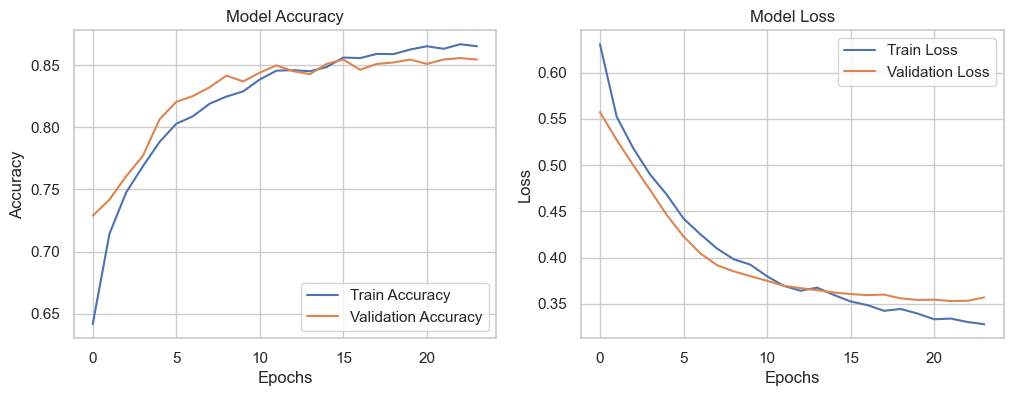

In [53]:

input_size = 16
output_size = 2
hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer (20% neurons deactivated)
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Another Dropout layer
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training parameters
batch_size = 100
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# Train the model and store history
history = model.fit(
    train_inputs, train_targets,
    batch_size=batch_size,
    epochs=max_epochs,
    validation_data=(validation_inputs, validation_targets),
    callbacks=[early_stopping],
    verbose=2
)

# Plot training history
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    # Plot loss
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    plt.show()

# Call the function to plot
plot_training_history(history)


In [51]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.3234 


In [39]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.36. Test accuracy: 84.31%


In [41]:
unscaled_data_dummies.head()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,protocol_type_ICMP,protocol_type_TCP,protocol_type_UDP,encryption_used_AES,encryption_used_DES,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,599,4,492.983263,0.606818,1,0,False,True,False,False,True,False,True,False,False,False
1,472,3,1557.996461,0.301569,0,0,False,True,False,False,True,False,False,True,False,False
2,629,3,75.044262,0.739164,2,0,False,True,False,False,True,True,False,False,False,False
3,804,4,601.248835,0.123267,0,0,False,False,True,False,True,False,False,False,False,True
4,453,5,532.540888,0.054874,1,0,False,True,False,True,False,False,False,True,False,False


In [43]:
import numpy as np

# Example of new input data with 16 features
new_data = [[1500, 1, 300, 0.1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

# Convert new_data to a NumPy array
new_data = np.array(new_data)

# Predict the class for the new input data
predictions = model.predict(new_data)

# Use argmax to get the predicted class (since output is a probability distribution)
predicted_class = np.argmax(predictions, axis=1)

# Output the predicted class
print("Predicted class for the new input:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted class for the new input: [1]
